<a href="https://colab.research.google.com/github/tranquockinh/Fast-Inversion/blob/main/2_Layer_SIM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WAVELENGTH1---WEIGHTING = [0.997166170186159 0.00282794922881747 5.88058502348572e-6]---PHASE VELOCITY = 92.66483763673514
WAVELENGTH2---WEIGHTING = [0.938242721859820 0.0589234483263389 0.00283382981384096]---PHASE VELOCITY = 90.84560979098971
WAVELENGTH3---WEIGHTING = [0.830086182527147 0.147741429562731 0.0221723879101217]---PHASE VELOCITY = 89.34380263065731
WAVELENGTH4---WEIGHTING = [0.721561359813193 0.216681362046628 0.0617572781401798]---PHASE VELOCITY = 90.45786064505873
WAVELENGTH5---WEIGHTING = [0.628455408329312 0.257904946498704 0.113639645171984]---PHASE VELOCITY = 93.74123583741829
WAVELENGTH6---WEIGHTING = [0.551923750365728 0.278162432161419 0.169913817472852]---PHASE VELOCITY = 98.21003896904548
WAVELENGTH7---WEIGHTING = [0.489462008178166 0.284859462404137 0.225678529417697]---PHASE VELOCITY = 103.13477706261432
WAVELENGTH8---WEIGHTING = [0.438210137377494 0.283351222435699 0.278438640186807]---PHASE VELOCITY = 108.0852592586391
WAVELENGTH9---WEIGHTING = [0.395747814

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER2---PHASE VELOCITY = 90.84560979098971---SHEAR WAVE VELOCITY = 98.43177455975461


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER3---PHASE VELOCITY = 89.34380263065731---SHEAR WAVE VELOCITY = 97.19383913438313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER4---PHASE VELOCITY = 90.45786064505873---SHEAR WAVE VELOCITY = 97.72717952314855


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER5---PHASE VELOCITY = 93.74123583741829---SHEAR WAVE VELOCITY = 99.80650172775657


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER6---PHASE VELOCITY = 98.21003896904548---SHEAR WAVE VELOCITY = 102.81658104359495


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER7---PHASE VELOCITY = 103.13477706261432---SHEAR WAVE VELOCITY = 106.27233414528322


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER8---PHASE VELOCITY = 108.0852592586391---SHEAR WAVE VELOCITY = 109.86801854046405


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER9---PHASE VELOCITY = 112.83588221551985---SHEAR WAVE VELOCITY = 113.42821303319002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER10---PHASE VELOCITY = 117.28222063358815---SHEAR WAVE VELOCITY = 116.85909226339098


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER11---PHASE VELOCITY = 121.38717668199777---SHEAR WAVE VELOCITY = 120.11510860217652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER12---PHASE VELOCITY = 125.1493494192257---SHEAR WAVE VELOCITY = 123.17844194552052


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER13---PHASE VELOCITY = 128.5851713776862---SHEAR WAVE VELOCITY = 126.04679081603442


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER14---PHASE VELOCITY = 131.71904419546118---SHEAR WAVE VELOCITY = 128.72622806933276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


LAYER15---PHASE VELOCITY = 134.57800733418412---SHEAR WAVE VELOCITY = 131.22705406307836


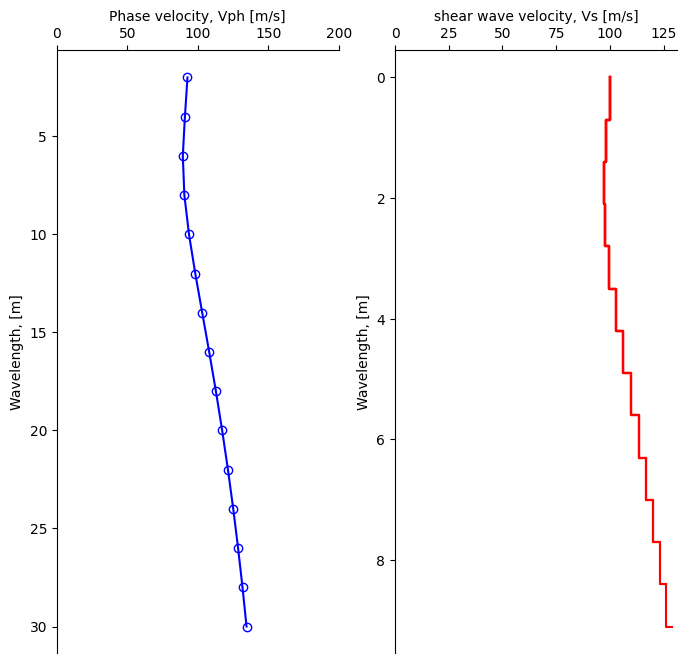

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# DISPERSION
Layer_Data = np.array([[100,5],
                       [60,10],
                       [200,np.inf]])
# Arrange vectors of shear wave velocity and depth
Depth = np.append(0,Layer_Data[:,1])
Vs = Layer_Data[:,0]
# Poisson's ratio
PR = 0.3
# Initialize wavelength
DC_points = 15
Lambda = np.zeros((DC_points))
Delta_Lambda = 2
for i in range(DC_points):
    if i == 0:
        Lambda[0] = 2
    else:
        Lambda[i] = Lambda[i-1] + Delta_Lambda
# Function to compute weights
def weighting(D,WL):
    z = sp.symbols('z')
    material_coefficient = 1
    limit_low = D[:-1]
    limit_up = D[1:]
    cv = np.array([0.2507, -0.4341, -0.8474*2*np.pi, -0.3933*2*np.pi])
    cv1 = cv[0] 
    cv2 = cv[1] 
    cv3 = cv[2] 
    cv4 = cv[3]
    # Particle displacement function
    PDF = (cv1*sp.exp(cv3/WL*z) + cv2*sp.exp(cv4/WL*z))*material_coefficient
    # Loop to compute wave a the wavelength given
    num_layer = len(Depth) - 1
    Area_i = np.zeros((num_layer),dtype='object')
    # Total area
    Area = sp.integrate(PDF,(z,0,np.inf))
    for j in range(num_layer):
        Area_i[j] = sp.integrate(PDF,(z,limit_low[j],limit_up[j]))
    weights = Area_i / Area
    return weights,num_layer
# Computing phase velocity by weighted average at each wavelength
beta = (0.87+1.12*PR)/(1+PR)
Vph = np.zeros((DC_points))
for i in range(DC_points):
    wp,num_layer = weighting(Depth,Lambda[i])
    Vph[i] = np.dot(beta*Vs,wp.flatten())
    print(('WAVELENGTH{}---WEIGHTING = {}---PHASE VELOCITY = {}').format(i+1,wp,Vph[i]))
fig,ax = plt.subplots(1,2,figsize=(8,8),dpi=100)
ax[0].plot(Vph,Lambda,'-bo',markerfacecolor='None')
ax[0].invert_yaxis()
ax[0].set_xlabel('Phase velocity, Vph [m/s]')
ax[0].set_ylabel('Wavelength, [m]')
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.tick_top()
ax[0].set_xlim(0,Vs[-1])
ax[0].spines['bottom'].set_color('white')
ax[0].spines['right'].set_color('white')

Alpha = 0.35
Step_Z = 0
Step_Vph = []
Vs = np.zeros((DC_points))
# Suppose I have only one layer
# Adding layers
for i in range(DC_points):
    Step_Z = np.append(Step_Z,Alpha*Lambda[i])
    Depth = np.append(Step_Z,np.inf)
    weighting_factor,num_layer = weighting(Depth,Lambda[i])
    Step_Vph = np.append(Vph[:i+1],Vph[i])
    Vs[i] = np.dot((1/beta)*Step_Vph,weighting_factor)
    print(('LAYER{}---PHASE VELOCITY = {}---SHEAR WAVE VELOCITY = {}').format(i+1,Vph[i],Vs[i]))
    ax[1].step(Vs[:i],Step_Z[:i],'r',markerfacecolor='None')
    ax[1].invert_yaxis()
    ax[1].set_xlabel('shear wave velocity, Vs [m/s]')
    ax[1].set_ylabel('Wavelength, [m]')
    ax[1].xaxis.set_label_position('top')
    ax[1].xaxis.tick_top()
    ax[1].set_xlim(0,Vs[-1])
    ax[1].spines['bottom'].set_color('white')
    ax[1].spines['right'].set_color('white')
